<a href="https://colab.research.google.com/github/pra-sh-ant/Book-Recommendation-System-Unsupervised-ML/blob/main/BOOK_RECOMMENDER_SYSTEM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    -



##### **Project Type**    -  Unsupervised
##### **Contribution**    - Individual

# **Project Summary -**

Write the summary here within 500-600 words.

# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


**Write Problem Statement Here.**

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
# Import Libraries
import numpy as np
import pandas as pd
pd.set_option("display.max_colwidth",None)
import seaborn as sns
sns.set_style('white')
import matplotlib.pyplot as plt
from difflib import SequenceMatcher
plt.rcParams["figure.figsize"] = (8,8)

In [2]:
# Suppress FutureWarnings
import warnings
warnings.filterwarnings("ignore")

### Dataset Loading

In [3]:
#from google.colab import drive
#drive.mount('/content/drive')

In [4]:
# Load Dataset
#books = pd.read_csv("/content/drive/MyDrive/AlmaBetter/Modules/Topic/Data Files/dat/data_book_recommendation/Books.csv",low_memory=False,error_bad_lines=False,encoding="latin-1")
#ratings = pd.read_csv("/content/drive/MyDrive/AlmaBetter/Modules/Topic/Data Files/dat/data_book_recommendation/Ratings.csv",low_memory=False,error_bad_lines=False,encoding="latin-1")
#users = pd.read_csv("/content/drive/MyDrive/AlmaBetter/Modules/Topic/Data Files/dat/data_book_recommendation/Users.csv",low_memory=False,error_bad_lines=False,encoding="latin-1")

In [5]:
#Load dataset from local
books = pd.read_csv("Books.csv",low_memory=False,error_bad_lines=False,encoding="latin-1")
ratings = pd.read_csv("Ratings.csv",low_memory=False,error_bad_lines=False,encoding="latin-1")
users = pd.read_csv("Users.csv",low_memory=False,error_bad_lines=False,encoding="latin-1")

### Dataset First View

In [6]:
# Dataset First Look
books.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0195153448.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0195153448.01.LZZZZZZZ.jpg
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0002005018.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0002005018.01.LZZZZZZZ.jpg
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0060973129.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0060973129.01.LZZZZZZZ.jpg
3,0374157065,Flu: The Story of the Great Influenza Pandemic of 1918 and the Search for the Virus That Caused It,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0374157065.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0374157065.01.LZZZZZZZ.jpg
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0393045218.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0393045218.01.LZZZZZZZ.jpg


In [7]:
ratings.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [8]:
users.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


### Dataset Rows & Columns count

In [9]:
# Dataset Rows & Columns count

print("Rows and columns in books:", books.shape)
print("Rows and columns in ratings:", ratings.shape)
print("Rows and columns in users:", users.shape)

Rows and columns in books: (271360, 8)
Rows and columns in ratings: (1149780, 3)
Rows and columns in users: (278858, 3)


### Dataset Information

In [10]:
#Dataset Info
books.info()
ratings.info()
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271360 non-null  object
 1   Book-Title           271360 non-null  object
 2   Book-Author          271359 non-null  object
 3   Year-Of-Publication  271360 non-null  object
 4   Publisher            271358 non-null  object
 5   Image-URL-S          271360 non-null  object
 6   Image-URL-M          271360 non-null  object
 7   Image-URL-L          271357 non-null  object
dtypes: object(8)
memory usage: 16.6+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1149780 entries, 0 to 1149779
Data columns (total 3 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   User-ID      1149780 non-null  int64 
 1   ISBN         1149780 non-null  object
 2   Book-Rating  1149780 non-null  int64 
dtypes: int64(2), obje

#### Duplicate Values

In [11]:
# Dataset Duplicate Value Count
print("Duplicate Count")
print("Books:", books.duplicated().sum())
print("Ratings:", ratings.duplicated().sum())
print("Users:", users.duplicated().sum())

Duplicate Count
Books: 0
Ratings: 0
Users: 0


#### Missing Values/Null Values

In [12]:
# Missing Values/Null Values Count

books_na = books.isna().sum()
ratings_na = ratings.isna().sum()
users_na = users.isna().sum()

# Display the missing value counts for each dataframe
print('Missing Values in Books Data:')
print(books_na)
print('\nMissing Values in Ratings Data:')
print(ratings_na)
print('\nMissing Values in Users Data:')
print(users_na)

Missing Values in Books Data:
ISBN                   0
Book-Title             0
Book-Author            1
Year-Of-Publication    0
Publisher              2
Image-URL-S            0
Image-URL-M            0
Image-URL-L            3
dtype: int64

Missing Values in Ratings Data:
User-ID        0
ISBN           0
Book-Rating    0
dtype: int64

Missing Values in Users Data:
User-ID          0
Location         0
Age         110762
dtype: int64


In [13]:
#Percentage of missing values in users_df
print(users.isnull().sum()/len(users)*100)

User-ID      0.000000
Location     0.000000
Age         39.719857
dtype: float64


In [14]:
# Select rows with missing values in books dataframe
missing_books = books[books.isnull().any(axis=1)]

# Display the rows with missing values as a properly formatted table
print(missing_books.to_string())

              ISBN                                                                                                   Book-Title      Book-Author Year-Of-Publication                                                     Publisher                                                   Image-URL-S                                                   Image-URL-M                                                   Image-URL-L
128890  193169656X                                                                                                  Tyrant Moon  Elaine Corvidae                2002                                                           NaN  http://images.amazon.com/images/P/193169656X.01.THUMBZZZ.jpg  http://images.amazon.com/images/P/193169656X.01.MZZZZZZZ.jpg  http://images.amazon.com/images/P/193169656X.01.LZZZZZZZ.jpg
129037  1931696993                                                                                              Finders Keepers  Linnea Sinclair                2001          

### What did you know about your dataset?

we have got some missing values in the dataset.

## ***2. Understanding Your Variables***

In [15]:
# Dataset Columns in each dataframe in list view
print("Books Columns:", books.columns.tolist())
print("Ratings Columns:", ratings.columns.tolist())
print("Users Columns:", users.columns.tolist())

Books Columns: ['ISBN', 'Book-Title', 'Book-Author', 'Year-Of-Publication', 'Publisher', 'Image-URL-S', 'Image-URL-M', 'Image-URL-L']
Ratings Columns: ['User-ID', 'ISBN', 'Book-Rating']
Users Columns: ['User-ID', 'Location', 'Age']


In [16]:
# Dataset Describe properly from all the three dataset in table view
print("Books Describe:")
print(books.describe())
print("\nRatings Describe:")
print(ratings.describe())
print("\nUsers Describe:")
print(users.describe())


Books Describe:
              ISBN      Book-Title      Book-Author Year-Of-Publication  \
count       271360          271360           271359              271360   
unique      271360          242135           102023                 118   
top     0195153448  Selected Poems  Agatha Christie                2002   
freq             1              27              632               17627   

        Publisher  \
count      271358   
unique      16807   
top     Harlequin   
freq         7535   

                                                         Image-URL-S  \
count                                                         271360   
unique                                                        271044   
top     http://images.amazon.com/images/P/185326119X.01.THUMBZZZ.jpg   
freq                                                               2   

                                                         Image-URL-M  \
count                                                         271360 

In [17]:
# Dataset Unique Values
print("Unique values in books:")
print(books.nunique())
print("Unique values in ratings:")
print(ratings.nunique())
print("Unique values in users:")
print(users.nunique())


Unique values in books:
ISBN                   271360
Book-Title             242135
Book-Author            102023
Year-Of-Publication       118
Publisher               16807
Image-URL-S            271044
Image-URL-M            271044
Image-URL-L            271041
dtype: int64
Unique values in ratings:
User-ID        105283
ISBN           340556
Book-Rating        11
dtype: int64
Unique values in users:
User-ID     278858
Location     57339
Age            165
dtype: int64


### Variables Description

We have got Outliers in our users age column.

### Check Unique Values for each variable.

In [18]:
#checking for unique values for each variable in each column in properly formatted table
dataframes = {'Books': books, 'Ratings': ratings, 'Users': users}

for name, df in dataframes.items():
    print(f'{name} Dataframe:')
    for column in df.columns:
        print(f'{column}: {df[column].nunique()} unique values')
        print(f'Unique values: {df[column].unique()}')
        print()

Books Dataframe:
ISBN: 271360 unique values
Unique values: ['0195153448' '0002005018' '0060973129' ... '006008667X' '0192126040'
 '0767409752']

Book-Title: 242135 unique values
Unique values: ['Classical Mythology' 'Clara Callan' 'Decision in Normandy' ...
 'Lily Dale : The True Story of the Town that Talks to the Dead'
 "Republic (World's Classics)"
 "A Guided Tour of Rene Descartes' Meditations on First Philosophy with Complete Translations of the Meditations by Ronald Rubin"]

Book-Author: 102023 unique values
Unique values: ['Mark P. O. Morford' 'Richard Bruce Wright' "Carlo D'Este" ...
 'David Biggs' 'Teri Sloat' 'Christopher  Biffle']

Year-Of-Publication: 118 unique values
Unique values: ['2002' '2001' '1991' '1999' '2000' '1993' '1996' '1988' '2004' '1998'
 '1994' '2003' '1997' '1983' '1979' '1995' '1982' '1985' '1992' '1986'
 '1978' '1980' '1952' '1987' '1990' '1981' '1989' '1984' '0' '1968' '1961'
 '1958' '1974' '1976' '1971' '1977' '1975' '1965' '1941' '1970' '1962'
 '1973'

## 3. ***Data Wrangling***

### Data Wrangling Code

In [19]:
# Select rows with missing values in books dataframe
missing_books = books[books.isnull().any(axis=1)]

# Display the rows with missing values as a properly formatted table
print(missing_books.to_string())

              ISBN                                                                                                   Book-Title      Book-Author Year-Of-Publication                                                     Publisher                                                   Image-URL-S                                                   Image-URL-M                                                   Image-URL-L
128890  193169656X                                                                                                  Tyrant Moon  Elaine Corvidae                2002                                                           NaN  http://images.amazon.com/images/P/193169656X.01.THUMBZZZ.jpg  http://images.amazon.com/images/P/193169656X.01.MZZZZZZZ.jpg  http://images.amazon.com/images/P/193169656X.01.LZZZZZZZ.jpg
129037  1931696993                                                                                              Finders Keepers  Linnea Sinclair                2001          

In [20]:
#Replacing NaNs with correct  values
books.loc[128890, 'Publisher'] = 'Mundania Press LLC'
books.loc[129037, 'Publisher'] = 'Bantam'
books.loc[187689, 'Book-Author'] = 'Larissa Anne Downes'

In [21]:
# Define a function to replace values in the DataFrame
def replace_df_value(df, index, column, value):
    """
    Replaces a value in the DataFrame at the specified index and column
    """
    df.loc[index, column] = value
    
# Replace the missing values in the books DataFrame
replace_df_value(books, 209538, 'Book-Title', 'DK Readers: Creating the X-Men, How It All Began (Level 4: Proficient Readers)')
replace_df_value(books, 209538, 'Book-Author', 'Michael Teitelbaum')
replace_df_value(books, 209538, 'Year-Of-Publication', 2000)
replace_df_value(books, 209538, 'Publisher', 'DK Publishing Inc')

replace_df_value(books, 221678, 'Book-Title', 'DK Readers: Creating the X-Men, How Comic Books Come to Life (Level 4: Proficient Readers)')
replace_df_value(books, 221678, 'Book-Author', 'James Buckley')
replace_df_value(books, 221678, 'Year-Of-Publication', 2000)
replace_df_value(books, 221678, 'Publisher', 'DK Publishing Inc')

replace_df_value(books, 220731, 'Book-Title', "Peuple du ciel, suivi de 'Les Bergers")
replace_df_value(books, 220731, 'Book-Author', 'Jean-Marie Gustave Le ClÃ?Â©zio')
replace_df_value(books, 220731, 'Year-Of-Publication', 2003)
replace_df_value(books, 220731, 'Publisher', 'Gallimard')

In [22]:
#Dropping images-url column
books.drop('Image-URL-S', axis=1, inplace=True)
books.drop('Image-URL-M', axis=1, inplace=True)
books.drop('Image-URL-L', axis=1, inplace=True)

In [23]:
# Select rows with missing values in books dataframe
missing_books = books[books.isnull().any(axis=1)]

# Display the rows with missing values as a properly formatted table
print(missing_books.to_string())

Empty DataFrame
Columns: [ISBN, Book-Title, Book-Author, Year-Of-Publication, Publisher]
Index: []


In [24]:
users.describe()

,User-ID,Age
count,278858.00000,168096.000000
mean,139429.50000,34.751434
std,80499.51502,14.428097
min,1.00000,0.000000
25%,69715.25000,24.000000
50%,139429.50000,32.000000
75%,209143.75000,44.000000
max,278858.00000,244.000000


In [25]:
#count each age value from users dataframe and show full table
users['Age'].value_counts().to_frame()

,Age
24.0,5687
25.0,5618
26.0,5547
23.0,5456
27.0,5383
...,...
168.0,1
132.0,1
159.0,1
186.0,1


In [26]:
#Retrieving age data between 5 to 95
users.loc[(users['Age'] > 105) | (users['Age'] < 5)] = np.nan

In [27]:
# replacing nan with average of 'age'
users['Age'].fillna((users['Age'].mean()), inplace=True)

In [28]:
#converting age from float to int
users['Age'] = users['Age'].astype(int)

In [29]:
# sort users df so as NaN values in age to be first and reset index to match with index of abs_age_series. Then using fillna()
users = users.sort_values('Age',na_position='first').reset_index(drop=True)

In [30]:
users['Age'].unique()

array([  5,   6,   7,   8,   9,  10,  11,  12,  13,  14,  15,  16,  17,
        18,  19,  20,  21,  22,  23,  24,  25,  26,  27,  28,  29,  30,
        31,  32,  33,  34,  35,  36,  37,  38,  39,  40,  41,  42,  43,
        44,  45,  46,  47,  48,  49,  50,  51,  52,  53,  54,  55,  56,
        57,  58,  59,  60,  61,  62,  63,  64,  65,  66,  67,  68,  69,
        70,  71,  72,  73,  74,  75,  76,  77,  78,  79,  80,  81,  82,
        83,  84,  85,  86,  87,  88,  89,  90,  91,  92,  93,  94,  95,
        96,  97,  98,  99, 100, 101, 102, 103, 104, 105])

In [31]:
users.describe()

,User-ID,Age
count,277870.000000,278858.000000
mean,139430.820157,34.511708
std,80495.287585,10.761264
min,1.000000,5.000000
25%,69714.250000,29.000000
50%,139425.500000,34.000000
75%,209135.750000,35.000000
max,278858.000000,105.000000


In [32]:
#number of unique values in Location vs actual values
print('Unique values in Location:', users['Location'].nunique())
print('Actual values in Location:', users['Location'].value_counts().sum())


Unique values in Location: 57158
Actual values in Location: 277870


In [33]:
#TOP 10 locations with most users
users['Location'].value_counts()[:10].to_frame()

,Location
"london, england, united kingdom",2488
"toronto, ontario, canada",2246
"sydney, new south wales, australia",1730
"melbourne, victoria, australia",1696
"portland, oregon, usa",1625
"chicago, illinois, usa",1520
"seattle, washington, usa",1478
"new york, new york, usa",1408
"madrid, madrid, spain",1394
"vancouver, british columbia, canada",1355


In [34]:
#extracting the country names from users_df
for i in users:
    users['country']=users.Location.str.extract(r'\,+\s?(\w*\s?\w*)\"*$')

In [35]:
#correcting the mispelled country names
users.loc[users['country'].isin(['australii','autralia','western australia']), 'country'] = 'australia'
users.loc[users['country'].isin(['unite states','01776','02458','19104','23232','30064','85021','87510','united sates','united staes','united state','united statea','united stated','america'
                                      'united stated of america','united states','united states of america','us','us of a','us virgin islands',
                                      'usa  canada','usa currently living in england','uusa','usaa','wonderful usa','california','orange co']), 'country'] = 'usa'
users.loc[users['country'].isin(['united kindgdom', 'united kindgonm','united kingdom','u k']), 'country'] = 'uk'  
users.loc[users['country'].isin(['the philippines', 'philippines', 'philippinies', 'phillipines', 'phils', 'phippines']), 'country'] = 'philippines'                                      
users.loc[users['country'].isin(['','xxxxxx','universe','nowhere','x','y','a','öð¹ú','the','unknown',np.nan,'n/a','aaa','z','somewherein space']), 'country'] = 'others'
users.loc[users['country'].isin([ 'italia','italien','itlay']), 'country'] = 'italy'
users.loc[users['country'].isin([ ' china öð¹ú','chinaöð¹ú','chian']), 'country'] = 'china'
users['country'].replace([ 'the gambia','the netherlands','geermany','srilanka','saudia arabia','brasil','_ brasil','indiai','malaysian','hongkong','russian federation'], 
                            ['gambia','netherlands','germany','sri lanka','saudi arabia','brazil','brazil','india','malaysia','hong kong','russia'],inplace=True)

In [36]:
#print users dataframe
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278858 entries, 0 to 278857
Data columns (total 4 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   User-ID   277870 non-null  float64
 1   Location  277870 non-null  object 
 2   Age       278858 non-null  int32  
 3   country   278858 non-null  object 
dtypes: float64(1), int32(1), object(2)
memory usage: 7.4+ MB


In [37]:
#useers dataframe with country column
users.head()

,User-ID,Location,Age,country
0,169759.0,"como, lombardia, italy",5,italy
1,12015.0,"wien, wien, austria",5,austria
2,241234.0,"rennes, bretagne, france",5,france
3,183914.0,"steralia, mainland, austbritania",5,austbritania
4,15091.0,"kleinsendelbach, bayern, germany",5,germany


In [38]:
#top 10 countries with most users with thier percentages
users['country'].value_counts()[:10].to_frame().merge(users['country'].value_counts(normalize=True).to_frame(), left_index=True, right_index=True).rename(columns={'country_x':'users_count', 'country_y':'users_percentage'})

,users_count,users_percentage
usa,139349,0.499713
canada,21609,0.077491
uk,18490,0.066306
germany,17026,0.061056
spain,13199,0.047332
australia,11722,0.042036
italy,11239,0.040304
others,6021,0.021592
france,3474,0.012458
portugal,3362,0.012056


In [39]:
#how many city, state and country values are missing
print('Missing values in country:', users['country'].isnull().sum())

Missing values in country: 0


In [40]:
#unique countries in users_df
print('Unique countries in users:', users['country'].nunique())


Unique countries in users: 460


In [41]:
# checking for unique user ids and isbn values or users have rated multiple books
print('Number of unique user ids is {} and ISBN no. is {}'.format(ratings['User-ID'].nunique(), ratings['ISBN'].nunique()))

Number of unique user ids is 105283 and ISBN no. is 340556


In [42]:
#calculate rating of each book and store it in new column
books['Rating'] = books['ISBN'].map(ratings.groupby('ISBN')['Book-Rating'].mean())
#rating must have one decimal place
books['Rating'] = books['Rating'].round(1)

In [43]:
#number of ratings for each book
books['Number of Ratings'] = books['ISBN'].map(ratings.groupby('ISBN')['Book-Rating'].count())


In [44]:
#Unique values in year of publication
books['Year-Of-Publication'].unique()


array(['2002', '2001', '1991', '1999', '2000', '1993', '1996', '1988',
       '2004', '1998', '1994', '2003', '1997', '1983', '1979', '1995',
       '1982', '1985', '1992', '1986', '1978', '1980', '1952', '1987',
       '1990', '1981', '1989', '1984', '0', '1968', '1961', '1958',
       '1974', '1976', '1971', '1977', '1975', '1965', '1941', '1970',
       '1962', '1973', '1972', '1960', '1966', '1920', '1956', '1959',
       '1953', '1951', '1942', '1963', '1964', '1969', '1954', '1950',
       '1967', '2005', '1957', '1940', '1937', '1955', '1946', '1936',
       '1930', '2011', '1925', '1948', '1943', '1947', '1945', '1923',
       '2020', '1939', '1926', '1938', '2030', '1911', '1904', '1949',
       '1932', '1928', '1929', '1927', '1931', '1914', '2050', '1934',
       '1910', '1933', '1902', '1924', '1921', '1900', '2038', '2026',
       '1944', '1917', '1901', '2010', '1908', '1906', '1935', '1806',
       '2021', '2012', '2006', 2000, 2003, '1909', '2008', '1378', '1919',
     

In [45]:
#converting year of publication to numeric
books['Year-Of-Publication'] = pd.to_numeric(books['Year-Of-Publication'], errors='coerce')

In [46]:
#The value 0 for Year-Of_Publication is invalid and as this dataset was published in 2004, We have assumed that the years after 2006 to be invalid and setting invalid years as NaN values
books.loc[(books['Year-Of-Publication'] > 2006) | (books['Year-Of-Publication'] == 0), 'Year-Of-Publication'] = np.NAN
#filling NaN values with mean
books['Year-Of-Publication'].fillna(round(books['Year-Of-Publication'].mean()), inplace=True)


In [47]:
books.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Rating,Number of Ratings
0,0195153448,Classical Mythology,Mark P. O. Morford,2002.0,Oxford University Press,0.0,1.0
1,0002005018,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,4.9,14.0
2,0060973129,Decision in Normandy,Carlo D'Este,1991.0,HarperPerennial,5.0,3.0
3,0374157065,Flu: The Story of the Great Influenza Pandemic of 1918 and the Search for the Virus That Caused It,Gina Bari Kolata,1999.0,Farrar Straus Giroux,4.3,11.0
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999.0,W. W. Norton &amp; Company,0.0,1.0


In [48]:
# lets see if there are any books in rating_df that are not in books_df
ratings['ISBN'].isin(books['ISBN']).value_counts()

True     1031136
False     118644
Name: ISBN, dtype: int64

In [49]:
#remove books that are not in books_df
ratings = ratings[ratings['ISBN'].isin(books['ISBN'])]


### What all manipulations have you done and insights you found?

Answer Here.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

In [50]:
#Explicit ratings
ratings_explicit = ratings[ratings['Book-Rating'] != 0]

#Implicit ratings
ratings_implicit = ratings[ratings['Book-Rating'] == 0]
#show count of implicit ratings and percentage of total ratings
print('Number of implicit ratings:', ratings_implicit.shape[0])
print('Percentage of implicit ratings:', round(ratings_implicit.shape[0]/ratings.shape[0]*100,2), '%')

Number of implicit ratings: 647294
Percentage of implicit ratings: 62.77 %


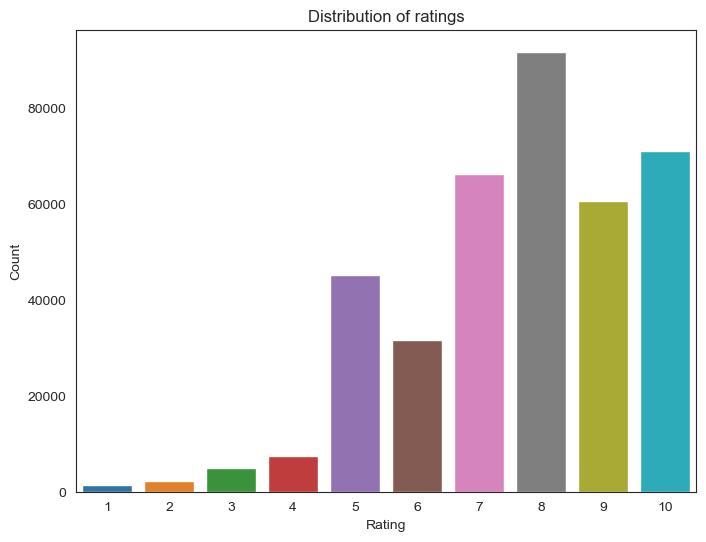

In [51]:
# Chart - 1
# Distribution of ratings
plt.figure(figsize=(8,6))
plt.rcParams['patch.force_edgecolor'] = True
sns.countplot(data=ratings_explicit , x='Book-Rating')
plt.title('Distribution of ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()


##### 1. Why did you pick the specific chart?

The chart is picked to understand the distribution of the ratings given by the users.

##### 2. What is/are the insight(s) found from the chart?

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 2

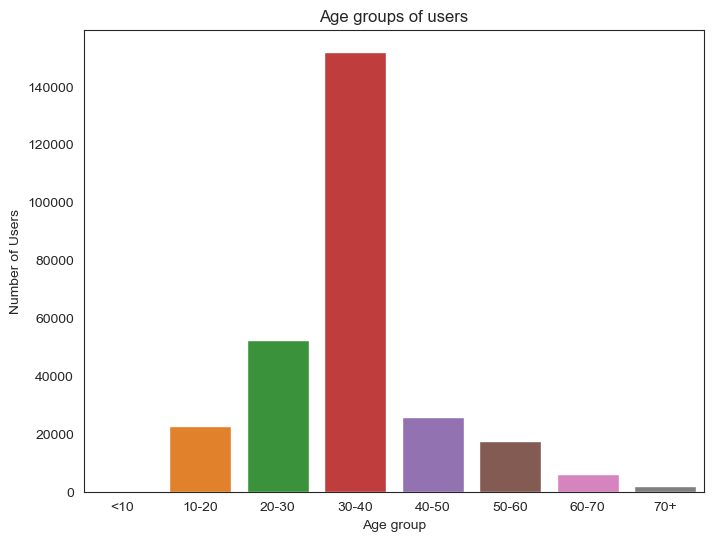

In [52]:
#define age groups
bins = [0, 10, 20, 30, 40, 50, 60, 70, np.inf]
labels = ['<10', '10-20', '20-30', '30-40', '40-50', '50-60','60-70','70+']
users['Age_group'] = pd.cut(users['Age'], bins, labels = labels)
plt.figure(figsize=(8,6))
sns.countplot(x='Age_group', data=users)
plt.title('Age groups of users')
plt.xlabel('Age group')
plt.ylabel('Number of Users')
plt.show()


##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 3

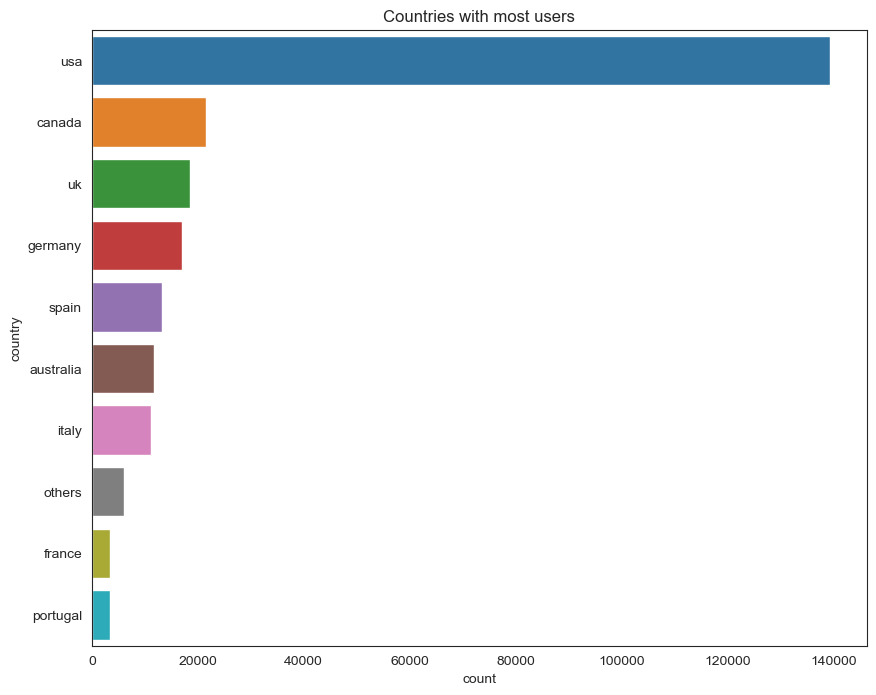

In [53]:
# Chart - 3 visualization code
#countries with most users
plt.figure(figsize=(10,8))
sns.countplot(y='country', data=users, order=users['country'].value_counts().index[:10])
plt.title('Countries with most users')
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 4

In [54]:
# Chart - 4 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 5

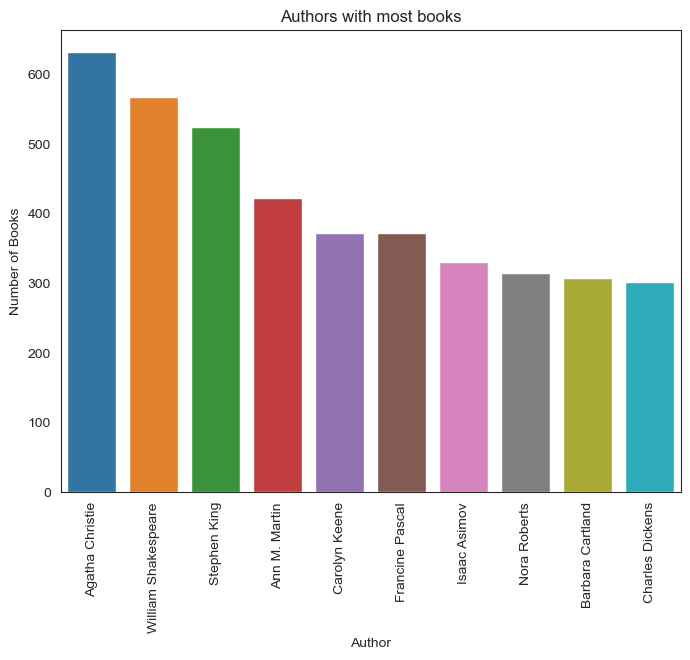

In [55]:
# Chart - 5 visualization code
#authors with most books
plt.figure(figsize=(8,6))
sns.barplot(x=books['Book-Author'].value_counts()[:10].index, y=books['Book-Author'].value_counts()[:10])
plt.title('Authors with most books')
plt.xlabel('Author')
plt.ylabel('Number of Books')
plt.xticks(rotation=90)
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 6

In [56]:
#Function to find users with most ratings
def h(df, ratings_explicit):
    return (
        df[df['User-ID'].isin(ratings_explicit['User-ID'].value_counts()[:10].index)]
        .merge(ratings_explicit['User-ID'].value_counts().to_frame().reset_index().rename(columns={'index': 'User-ID', 'User-ID': 'Number of Ratings'}), on='User-ID')
        .sort_values('Number of Ratings', ascending=False)
    )

top10_users_df = h(users, ratings_explicit)
top10_users_df.drop_duplicates(inplace=True)
top10_users_df.reset_index(drop=True, inplace=True)
top10_users_df

,User-ID,Location,Age,country,Age_group,Number of Ratings
0,11676.0,"n/a, n/a, n/a",34,others,30-40,6943
1,98391.0,"morrow, georgia, usa",52,usa,50-60,5691
2,189835.0,"honolulu, hawaii, usa",34,usa,30-40,1899
3,153662.0,"ft. stewart, georgia, usa",44,usa,40-50,1845
4,23902.0,"london, england, united kingdom",34,uk,30-40,1180
5,235105.0,"st louis, missouri, usa",46,usa,40-50,1020
6,76499.0,"new york, new york, usa",34,usa,30-40,1012
7,171118.0,"toronto, ontario, canada",47,canada,40-50,962
8,16795.0,"mechanicsville, maryland, usa",47,usa,40-50,959
9,248718.0,"hyde park, new york, usa",43,usa,40-50,941


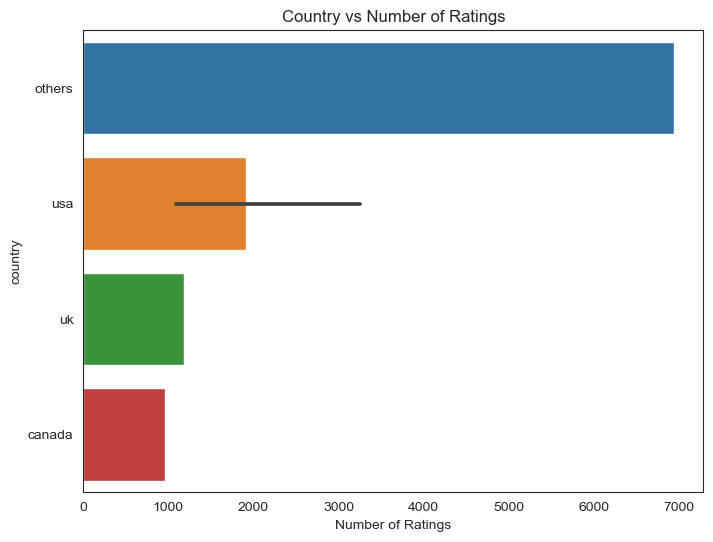

In [57]:
# Chart - 6 visualization code
# Visualize top10_users_df country,age vs number of ratings
plt.figure(figsize=(8,6))
sns.barplot(x='Number of Ratings', y='country', data=top10_users_df)
plt.title('Country vs Number of Ratings')
plt.show()


##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 7

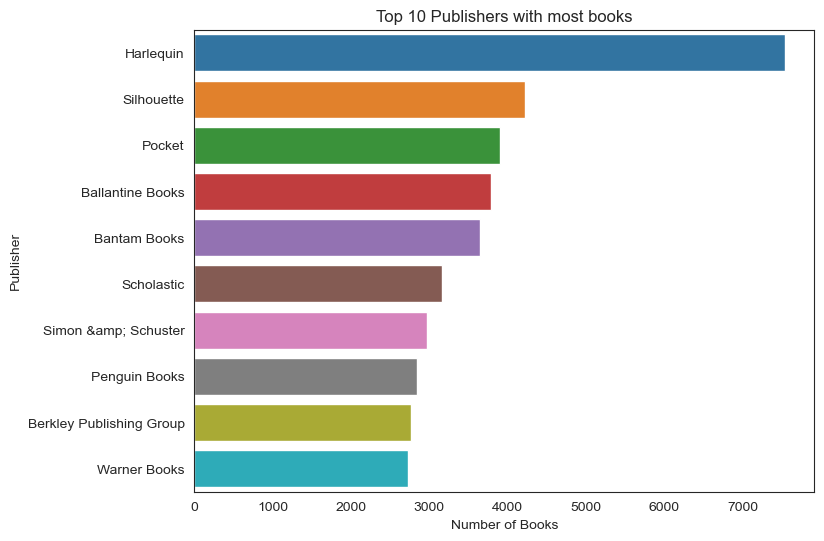

In [58]:
# Chart - 7 visualization code
#top 10 publishers with most books

plt.figure(figsize=(8,6))
sns.barplot(x=books['Publisher'].value_counts()[:10], y=books['Publisher'].value_counts()[:10].index)
plt.title('Top 10 Publishers with most books')
plt.xlabel('Number of Books')
plt.ylabel('Publisher')
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 8

In [59]:
# Check how many ISBNs in the 'books' dataset are present in the 'ratings' dataset
books['ISBN'].isin(ratings['ISBN']).value_counts()

True     270151
False      1209
Name: ISBN, dtype: int64

In [60]:
# Check how many User-IDs in the 'ratings' dataset are present in the 'users' dataset
ratings['User-ID'].isin(users['User-ID']).value_counts()

True     1027296
False       3840
Name: User-ID, dtype: int64

In [61]:
#Showing the users that are in users but not in ratings OR users that have not rated any book
users['User-ID'].isin(ratings['User-ID']).value_counts()

False    187068
True      91790
Name: User-ID, dtype: int64

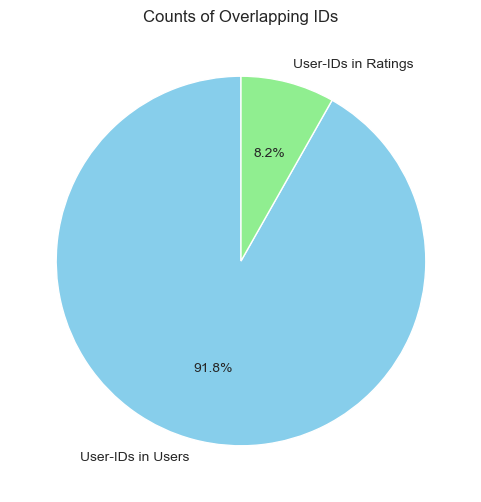

In [62]:
# Chart - 8 visualization code

import matplotlib.pyplot as plt

# Results of the checks
results = [ratings['User-ID'].isin(users['User-ID']).sum(), 
           users['User-ID'].isin(ratings['User-ID']).sum()]

# Labels for the slices
labels = [ 'User-IDs in Users', 'User-IDs in Ratings']

# Create a pie chart
plt.figure(figsize=(6, 6))
plt.pie(results, labels=labels, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightgreen', 'pink'])
plt.title('Counts of Overlapping IDs')

plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 9

In [63]:
# Chart - 9 visualization code

# Create a new figure with a size of 20x14 inches
fig = plt.figure(figsize=(20, 14))

# Loop through each age group and create two subplots for each group
i = 1
for group in ['<10', '10-20', '20-30', '30-40', '40-50', '50-60','60-70','70+']:
  
  # Get the books read by users in the current age group and calculate the number of users who read each book
  age_df = books.loc[books['Age_group'] == group].groupby(['Book-Title']).agg(No_of_users=('User-ID', 'nunique'), total_rating=('Book-Rating', 'sum')).reset_index() 
  
  # Create a subplot for the top 5 popular books in the current age group
  plt.subplot(5, 2, i)
  
  # Sort the books by the number of users who read them and plot a bar chart of the top 5 books
  age_df.sort_values(by='No_of_users', ascending=False, inplace=True)
  sns.barplot(x='No_of_users', y='Book-Title', palette='Paired', data=age_df.head(5))
  
  # Add a title to the subplot
  plt.title('Top 5 Popular books among {}'.format(group), size=16)
  
  # Increment the subplot index
  i += 1
  
  # Create a subplot for the top 5 rated books in the current age group
  plt.subplot(5, 2, i)
  
  # Sort the books by the total rating they received and plot a bar chart of the top 5 books
  age_df.sort_values(by='total_rating', ascending=False, inplace=True)
  sns.barplot(x='total_rating', y='Book-Title', palette='Set2', data=age_df.head(5))
  
  # Add a title to the subplot
  plt.title('Top rated books by {}'.format(group), size=16)
  
  # Increment the subplot index
  i += 1
  
# Adjust the layout of the subplots to prevent overlapping
plt.tight_layout()

KeyError: 'Age_group'

<Figure size 2000x1400 with 0 Axes>

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 10

In [ ]:
# Chart - 10 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 11

In [ ]:
# Chart - 11 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 12

In [ ]:
# Chart - 12 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 13

In [ ]:
# Chart - 13 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 14 - Correlation Heatmap

In [ ]:
# Correlation Heatmap visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

#### Chart - 15 - Pair Plot

In [ ]:
# Pair Plot visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Answer Here.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [ ]:
# Handling Missing Values & Missing Value Imputation

#### What all missing value imputation techniques have you used and why did you use those techniques?

Answer Here.

### 2. Handling Outliers

In [ ]:
# Handling Outliers & Outlier treatments

##### What all outlier treatment techniques have you used and why did you use those techniques?

Answer Here.

### 3. Categorical Encoding

In [ ]:
# Encode your categorical columns

#### What all categorical encoding techniques have you used & why did you use those techniques?

Answer Here.

### 4. Textual Data Preprocessing
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [ ]:
# Expand Contraction

#### 2. Lower Casing

In [ ]:
# Lower Casing

#### 3. Removing Punctuations

In [ ]:
# Remove Punctuations

#### 4. Removing URLs & Removing words and digits contain digits.

In [ ]:
# Remove URLs & Remove words and digits contain digits

#### 5. Removing Stopwords & Removing White spaces

In [ ]:
# Remove Stopwords

In [ ]:
# Remove White spaces

#### 6. Rephrase Text

In [ ]:
# Rephrase Text

#### 7. Tokenization

In [ ]:
# Tokenization

#### 8. Text Normalization

In [ ]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)

##### Which text normalization technique have you used and why?

Answer Here.

#### 9. Part of speech tagging

In [ ]:
# POS Taging

#### 10. Text Vectorization

In [ ]:
# Vectorizing Text

##### Which text vectorization technique have you used and why?

Answer Here.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [ ]:
# Manipulate Features to minimize feature correlation and create new features

#### 2. Feature Selection

In [ ]:
# Select your features wisely to avoid overfitting

##### What all feature selection methods have you used  and why?

Answer Here.

##### Which all features you found important and why?

Answer Here.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [ ]:
# Transform Your data

### 6. Data Scaling

In [ ]:
# Scaling your data

##### Which method have you used to scale you data and why?

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Answer Here.

In [ ]:
# DImensionality Reduction (If needed)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

### 8. Data Splitting

In [ ]:
# Split your data to train and test. Choose Splitting ratio wisely.

##### What data splitting ratio have you used and why?

Answer Here.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Answer Here.

In [ ]:
# Handling Imbalanced Dataset (If needed)

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer Here.

## ***7. ML Model Implementation***

### ML Model - 1

In [ ]:
# ML Model - 1 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### ML Model - 2

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### ML Model - 3

In [ ]:
# ML Model - 3 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Answer Here.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Answer Here.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [ ]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [ ]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***